<table align="center" width=100%>
    <tr>
       <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> MINI PROJECT 2 - Data Analysis and Visualization <br>
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="NEW_GL_Logo.png">
        </td>
    </tr>
</table>

# Data Pre-Processing

# 1.	Import the necessary libraries and read the data.

In [2]:
#Importing libraries for performing various kinds of operations based on the methods / functions etc. inside them.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the "fifa.csv" data set using .read_csv() pandas method and storing the same into "df_fb_players" dataframe
df_fb_players = pd.read_csv("fifa.csv")

#Displaying the first 5 rows of the "df_fb_players" dataframe
df_fb_players.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
#Printing the shape (i.e., rows * cols) and information (i.e., Index, Fields, No. of null values, data type etc.) about the df
print("No. of rows and columns in the dataset:",df_fb_players.shape)
print("\nInfo:")
print(df_fb_players.info())

No. of rows and columns in the dataset: (18207, 60)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  In

#### Inferences:

The "fifa.csv" file that contains details (like age, skill rating, wages and player value, etc.) for over 18,000 players playing in various football clubs in Europe is read as an input (using .read_csv() method) to retrieve and store the details to the pandas dataframe called as "df_fb_players". First 5 rows from the dataframe is displayed as the sample outcome using .head() method.

To determine the shape of the dataframe and to identify the properties of the features in the dataframe, the .shape and .info() methods are used respectively.

The outcome shows that there are 18207 observations and 60 features, where majority of features has null values in it.

# 2. Drop any columns that we deem unnecessary for analysis

In [4]:
#Making a deep copy of the dataset from "df_fb_players" dataframe and storing the same into a new df called "df_copy"
df_copy = df_fb_players.copy(deep=True)

#Displaying the first 5 rows of the "df_copy" dataframe
df_copy.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
#Determining the feature(s) that has more than 80% null values to consider them as a candidate for dropping from dataframe
print("Features with more than 80% of null values:",[var for var in df_copy.columns if df_copy[var].isnull().mean()>0.8])

Features with more than 80% of null values: ['Loaned From']


In [32]:
#Validating the dimensions before dropping the unnecessary features
print("Dimensions of the dataframe: \na. before dropping the features:",df_copy.shape)

#Dropping 6 features from "df_copy" that are either not contributing for output calculating or has majority of null values
#inplace = True ==> To drop the features from the source dataframe (i.e., df_copy) itself
df_copy.drop(["Photo","Nationality","Flag","Club Logo","Jersey Number","Loaned From"],axis=1,inplace=True)

#Validating the dimensions before dropping the unnecessary columns
print("b. after dropping the features:",df_copy.shape)

#Displaying the first 5 rows of the "df_copy" dataframe, after dropping the above mentioned features
df_copy.head()

Dimensions of the dataframe: 
a. before dropping the features: (18207, 60)
b. after dropping the features: (18207, 54)


,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### Inferences:
Before dropping the features that aren't correlating or has any relationship with the output feature (i.e., Overall Rating), the other features that has majority (i.e., >=80%) of null values were determined for dropping.

There is only 1 such feature (i.e., "Loaned From"), where more than 80% of null values and has been considered for dropping from dataframe. In addition, a judgemental call (from domain experts point of view) has been taken on the other features that aren't impacting the output feature and it was concluded that 5 more features (i.e., "Photo", "Nationality", "Flag", "Club Logo", "Jersey Number") will be dropped as well, from df_copy dataframe.

# 3. Convert columns

#### 1. Convert "Values" feature to Float after getting rid of currency symbol and suffix.

In [33]:
#Printing the outcome of the "Value" feature before removing the currency symbol / suffix
print("Before data conversion:\n",df_copy["Value"].head())

#Replacing the currency symbol / suffix (i.e., €,M,K) with a null char under the "Value" feature
#Converting the final output to the float datatype
df_copy["Value"] = df_copy["Value"].replace({'€':'','M': 'e+06', 'K': 'e+03'}, regex=True).astype(float)

#Printing the outcome of the "Value" feature after removing the currency symbol / suffix
print("\nAfter data conversion:\n",df_copy["Value"].head())

Before data conversion:
 0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
Name: Value, dtype: object

After data conversion:
 0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64


#### 2. Convert "Wage" feature to Float after getting rid of currency symbol and suffix

In [34]:
#Printing the outcome of the "Wage" feature before removing the currency symbol / suffix
print("Before data conversion:\n",df_copy["Wage"].head())

#Replacing the currency symbol / suffix (i.e., € and K) with a null char under the "Wage" feature
#Converting the final output to the float datatype
df_copy["Wage"] = df_copy["Wage"].replace({'€':'','M': 'e+06', 'K': 'e+03'}, regex=True).astype(float)

#Printing the outcome of the "Wage" feature after removing the currency symbol / suffix
print("\nAfter data conversion:\n",df_copy["Wage"].head())

Before data conversion:
 0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

After data conversion:
 0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64


#### 3. Convert "Joined" feature to int with only year

In [35]:
#Printing the outcome of the "Joined" feature before coverting it from datetime to year with int datatype
print("Before data conversion:\n",df_copy["Joined"].head())

#Coverting the datatime under "Joined" feature into year with int datatype
#When converting Nan to int, it returns an error - Hence, filling the Nan with 0 before int datatype conversion
df_copy["Joined"] = pd.DatetimeIndex(df_copy["Joined"]).year.fillna(0).astype(int)

#Printing the outcome of the "Joined" feature after coverting it from datetime to year with int datatype
print("\nAfter data conversion:\n",df_copy["Joined"].head())

Before data conversion:
 0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

After data conversion:
 0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int64


#### 4. Convert "Contract Valid Until" feature to datetime type

In [36]:
#Printing the outcome of the "Contract Valid Until" feature before applying datetime datatype conversion
print("Before data conversion:\n",df_copy["Contract Valid Until"].head())

#Converting object into datatime data type by using .to_datatime()
#infer_datetime_format=True ==> Inferring and parsing the format of the datetime strings
df_copy["Contract Valid Until"] = pd.to_datetime(df_copy["Contract Valid Until"],infer_datetime_format=True)

#Printing the outcome of the "Contract Valid Until" feature after applying datetime datatype conversion
print("\nAfter data conversion:\n",df_copy["Contract Valid Until"].head())

Before data conversion:
 0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

After data conversion:
 0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]


#### 5. Convert "Height" feature to Float with decimal points

In [37]:
#Printing the outcome of the "Height" feature before applying float datatype conversion
print("Before data conversion:\n",df_copy["Height"].head())

#Replacing the "'" with a dot ".", before converting the object into float datatype by using .astype(float)
df_copy["Height"]=df_copy["Height"].replace({"'": '.'}, regex=True).astype(float)

#Printing the outcome of the "Height" feature before applying float datatype conversion
print("\nAfter data conversion:\n",df_copy["Height"].head())

Before data conversion:
 0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

After data conversion:
 0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64


#### 6. Remove the suffix in 'Weight' feature and convert to float

In [38]:
#Printing the outcome of the "Weight" feature before applying float datatype conversion
print("Before data conversion:\n",df_copy["Weight"].head())

#Replacing the "lbs" keyword with a null char., before converting the datatype to float using .astype(float)
df_copy["Weight"] = df_copy["Weight"].replace({"lbs": ''}, regex=True).astype(float)

#Printing the outcome of the "Weight" feature after applying float datatype conversion
print("\nAfter data conversion:\n",df_copy["Weight"].head())

Before data conversion:
 0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

After data conversion:
 0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64


#### 7. Convert 'Release Clause' feature to Float after getting rid of currency symbol and suffix.

In [39]:
#Printing the outcome of the "Release Clause" feature before removing the currency symbols and applying float datatype conversion
print("Before data conversion:\n",df_copy["Release Clause"].head())

#Replacing the currency keywords (i.e., €,K,M) with a null char., before applying float datatype conversion
df_copy["Release Clause"] = df_copy["Release Clause"].replace({'€':'','M': 'e+06', 'K': 'e+03'}, regex=True).astype(float)

#Printing the outcome of the "Release Clause" feature afterremoving the currency symbols and applying float datatype conversion
print("\nAfter data conversion:\n",df_copy["Release Clause"].head())

Before data conversion:
 0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object

After data conversion:
 0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64


#### Inferences:

In the above examples, we have performed the below operations:

a. Removed the currency symbols (i.e., "€", "K" and "M")

b. Replaced few keywords like "lbs", " ' " etc. with other required ones.

c. Converted the datatype of "Value", "Wage", "Height", "Weight" and "Release Clause" features to float, "Joined" to int (where Nan values are handled) and finally "Contract Valid Until" to datatime datatypes

# 4. Check for missing values and do a mean imputation

In [40]:
#Determining the no. of null values in each feature from df_copy dataframe
print("Features and no. of null values in each:\n",df_copy.isnull().sum())

#Determining the features that has atleast one null value using List Comprehension approach
null_val_cols = [var for var in df_copy.columns if df_copy[var].isnull().mean()>0]

#Identifying and print the number of features with atleast one null values
print("\nNo. of features with atleast one null value:",len(null_val_cols))
print("\nFeatures with atleast one null value:",null_val_cols)

Features and no. of null values in each:
 ID                             0
Name                           0
Age                            0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Joined                         0
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
A

<Figure size 14400x7200 with 0 Axes>

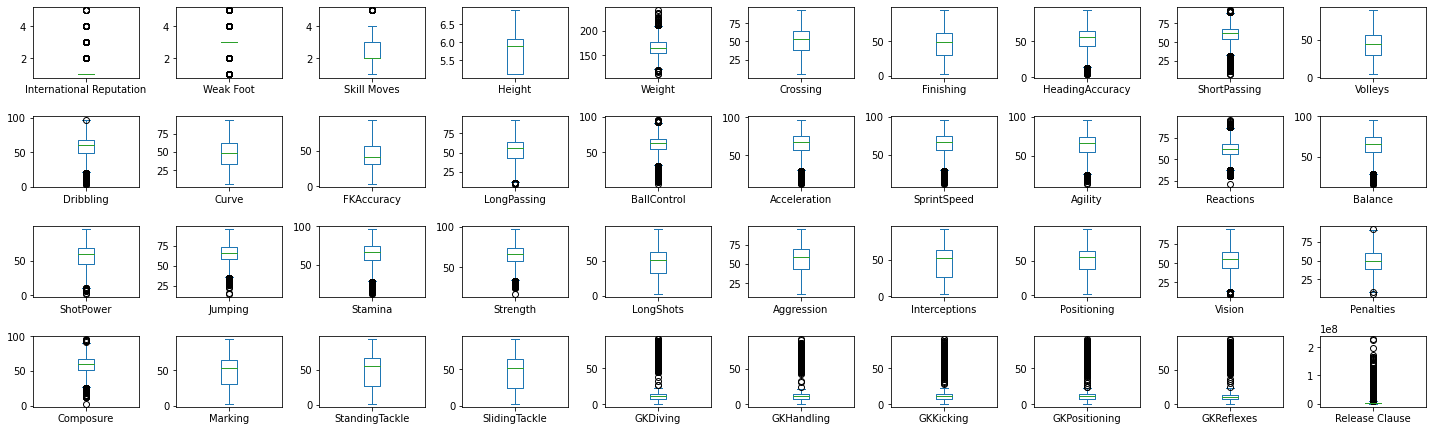

In [41]:
#Loading the features with null values to a dataframe called as "df_null_val_cols"
df_null_val_cols = df_copy[null_val_cols]

#Setting up the size of the figure for easy visualizing the outcome
plt.figure(figsize = [200,100])

#Creating a boxplot for all numeric variables, where:
#a. kind = 'box' ==> Specifies the type of plot (i.e., box plot)
#b. subplots = True ==> Specifies the subplots to created for each numerical variables
#c. layout ==> Specifies the number of observations and features for the subplot
#d. figsize ==> Specifies the figure size of each subplot
df_null_val_cols.plot(kind='box',subplots=True, layout=(10,10), figsize=(20,15))

#Specifying the padding between the subplots
plt.tight_layout()

#Displaying boxplot
plt.show()

In [42]:
#Calculating the Q1, Q3, IQR, lower and upper bound limits to determine whether 
           #the outliers exist for all the features with atleast one null value
Q1 = df_null_val_cols.quantile(0.25)
Q3 = df_null_val_cols.quantile(0.75)
IQR = Q3 - Q1
df_null_val_cols_ubl = Q3 + (1.5 * IQR)
df_null_val_cols_lbl = Q1 - (1.5 * IQR)

#Including only the features that are numerical (i.e., integer and float) in nature
df_num_cols = df_null_val_cols.select_dtypes(include=[np.int64,float])

#Trimming only the observations which has outliers, for all the numerical features which has null atleast one null value
#Determining no. of features that has outliers and listing them down for reference
df_null_val_cols_no_outlier = ((df_num_cols < df_null_val_cols_lbl) | (df_num_cols > df_null_val_cols_ubl)).sum()>0
print("No. of features that has outliers:",len(df_null_val_cols_no_outlier[df_null_val_cols_no_outlier]))
print("\nFeatures with outliers:",df_null_val_cols_no_outlier[df_null_val_cols_no_outlier].index.tolist())

#Trimming only the observations which doesn't have outliers, for all the numerical features which has null atleast one null value
#Determining no. of features that doesn't have outliers and listing them down for reference
df_null_val_cols_no_outlier = ((df_num_cols < df_null_val_cols_lbl) | (df_num_cols > df_null_val_cols_ubl)).sum()==0
print("\nNo. of features that has no outliers:",len(df_null_val_cols_no_outlier[df_null_val_cols_no_outlier]))
print("\nFeatures with no outliers:",df_null_val_cols_no_outlier[df_null_val_cols_no_outlier].index.tolist())

No. of features that has outliers: 27

Features with outliers: ['International Reputation', 'Weak Foot', 'Skill Moves', 'Weight', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'Vision', 'Penalties', 'Composure', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

No. of features that has no outliers: 13

Features with no outliers: ['Height', 'Crossing', 'Finishing', 'Volleys', 'Curve', 'FKAccuracy', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Marking', 'StandingTackle', 'SlidingTackle']


In [43]:
#Extracting the list of features that doesn't have outlier and has atleast one null values, before mean value imputation
before_mean_imp = df_copy[df_null_val_cols_no_outlier[df_null_val_cols_no_outlier].index.tolist()].isnull().sum()

#Printing the no. of features that doesn't have outlier and has atleast one null values
print("\nNo. of numerical features with null values and doesn't have outlier, before mean imputation:",
      before_mean_imp[before_mean_imp>0].count())

#Printing the features that doesn't have outlier and has atleast one null values along with the no. of null values against each
print("\nFeatures with null values and doesn't have outlier, which are numerical in nature:\n",
      df_copy[df_null_val_cols_no_outlier[df_null_val_cols_no_outlier].index.tolist()].isnull().sum())

#df_null_val_cols_no_outlier[df_null_val_cols_no_outlier].index ==> Features for which mean impuations need to be applied
#fillna ==> To fill the missing values with the mean of each features
for var in df_null_val_cols_no_outlier[df_null_val_cols_no_outlier].index:
    df_copy[var].fillna(df_copy[var].mean(), inplace=True)

#Extracting the list of features that doesn't have outlier and has atleast one null values, after mean value imputation
after_mean_imp = df_copy[df_null_val_cols_no_outlier[df_null_val_cols_no_outlier].index.tolist()].isnull().sum()

#Printing the no. of features that doesn't have outlier and has atleast one null values
#As mean value imputation is done for the null values, it returns 0
print("\nNo. of numerical features with null values and doesn't have outlier, after mean imputation:",
      after_mean_imp[after_mean_imp>0].count())

#Printing the features that doesn't have outlier and has atleast one null values along with the no. of null values against each
#As mean value imputation is done for the null values, it returns 0
print("\nFeatures with null values and doesn't have outlier, which are numerical in nature:\n",
      df_copy[df_null_val_cols_no_outlier[df_null_val_cols_no_outlier].index.tolist()].isnull().sum())


No. of numerical features with null values and doesn't have outlier, before mean imputation: 13

Features with null values and doesn't have outlier, which are numerical in nature:
 Height            48
Crossing          48
Finishing         48
Volleys           48
Curve             48
FKAccuracy        48
LongShots         48
Aggression        48
Interceptions     48
Positioning       48
Marking           48
StandingTackle    48
SlidingTackle     48
dtype: int64

No. of numerical features with null values and doesn't have outlier, after mean imputation: 0

Features with null values and doesn't have outlier, which are numerical in nature:
 Height            0
Crossing          0
Finishing         0
Volleys           0
Curve             0
FKAccuracy        0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Marking           0
StandingTackle    0
SlidingTackle     0
dtype: int64


#### Inferences:

As the intention is to impute the mean for the missing values under each features, it is handled using the below 3 steps:

#### Step 1: 
Determine the numerical features (i.e., int and float) with atleast one missing value. There are 46 numerical features with atleast one null values exist in the df_copy dataframe.

#### Step 2:
Ensure that the numerical features doesn't have an outlier by using IQR technique or by visualizing the features using boxplot. Since, the mean value is heavily impacted when the outlier exist, we are verifying and trimming only the features where the outlier doesn't exist. Within the chosen 46 features, there are 13 numerical features with 48 null values each and doesn't have an outlier in the df_copy dataframe.

#### Step 3:
Calculate the mean for each of these 13 features (i.e., Height, Crossing, Finishing, Volleys, Curve, FKAccuracy, LongShots, Aggression, Interceptions, Positioning, Marking, StandingTackle, SlidingTackle) and impute the same for the missing values.

After mean value imputation, it was finally ensured that there are no more missing values exist for these 13 features.

# Exploratory Analysis

# 1. Plot the distribution of Overall rating for all players

Percentage of outliers in 'Overall' feature: 0.9 %


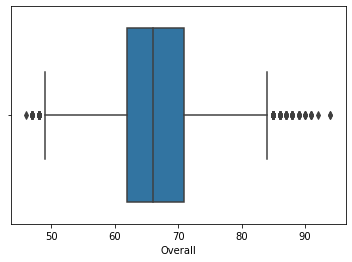

In [44]:
#Calculating the Q1, Q3, IQR, lower and upper bound limits to determine the outliers from "Overall" feature
Q1 = df_copy["Overall"].quantile(0.25)
Q3 = df_copy["Overall"].quantile(0.75)
IQR = Q3 - Q1
df_copy_ubl = Q3 + (1.5 * IQR)
df_copy_lbl = Q1 - (1.5 * IQR)

#Determing and capturing the outliers based on the upper and lower bound limits identified above
df_copy_outlier = df_copy[(df_copy["Overall"] < df_copy_lbl) | (df_copy["Overall"] > df_copy_ubl)]

#Determing the % of outliers that exist under "Overall" feature to see if it has any impact on the distribution
print("Percentage of outliers in 'Overall' feature:",
      round((df_copy_outlier["Overall"].count() / df_copy["Overall"].count())*100,2),"%")

#Plotting the data from "Overall" feature using seaborn's boxplot, to visualize the outliers
sns.boxplot(df_copy["Overall"])
plt.show()

Mean = Median = Mode:  True

Skewness for 'Overall Rating' feature is: 0.07

Kurtosis for 'Overall Rating' feature is 0.1


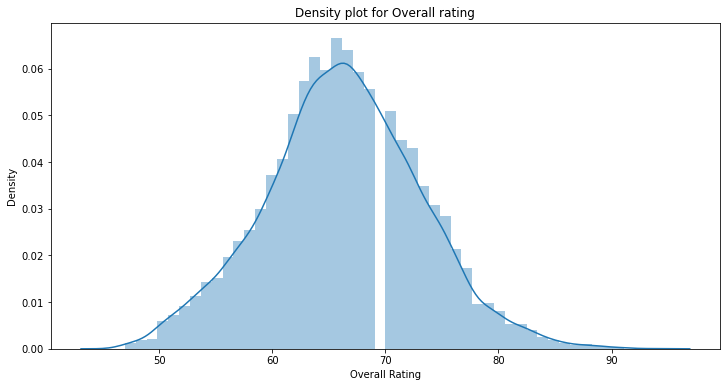

In [45]:
#Setting up the size of the figure for easy visualizing the outcome
plt.figure(figsize=(12,6))

#Visualizing the distribution from the "Overall" feature using seaborn's displot with kernel density estimator
sns.distplot(df_copy["Overall"])

#Determing with the mean = median = mode to conclude the normal distribution of the observations from "Overall" feature
#Comparison is done by rounding off with 0 decimal places, where the outcome is a whole number (i.e., 66) for all the 3 cases
print("Mean = Median = Mode: ",round(df_copy["Overall"].mean(),0) == 
      round(df_copy["Overall"].median(),0) == round(df_copy["Overall"].mode()[0],0))

#Identifying the skewness in "Overall" feature and printing the outcome of the same by rounding off to 2 decimal places
print("\nSkewness for 'Overall Rating' feature is:",round(df_copy["Overall"].skew(),2))
print("\nKurtosis for 'Overall Rating' feature is",round(df_copy["Overall"].kurt(),2))

#Setting the title of the distribution plot
plt.title("Density plot for Overall rating")
 
#Setting the label for x-axis
plt.xlabel("Overall Rating")

#Displaying the distribution plot
plt.show()

#### Inferences:

For the "Overall" feature, the Q1, Q3, IQR, lower and upper bound limits are calculated to determine the no. and % of outliers and also visualized them using the boxplot.

As ~1% of data from "Overall" feature are outliers, to determine whether it has an impact to the distribution, the mean, median and mode values (i.e., ~66 each) and the skewsness (i.e., 0.07) are computed for the "Overall" feature. As the values of mean, median and mode are same after rounding off and the skewness and kurtosis is almost 0, it is evident that the curve is symmetrical and the data are normally distributed.

# 2. Pair plots for Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

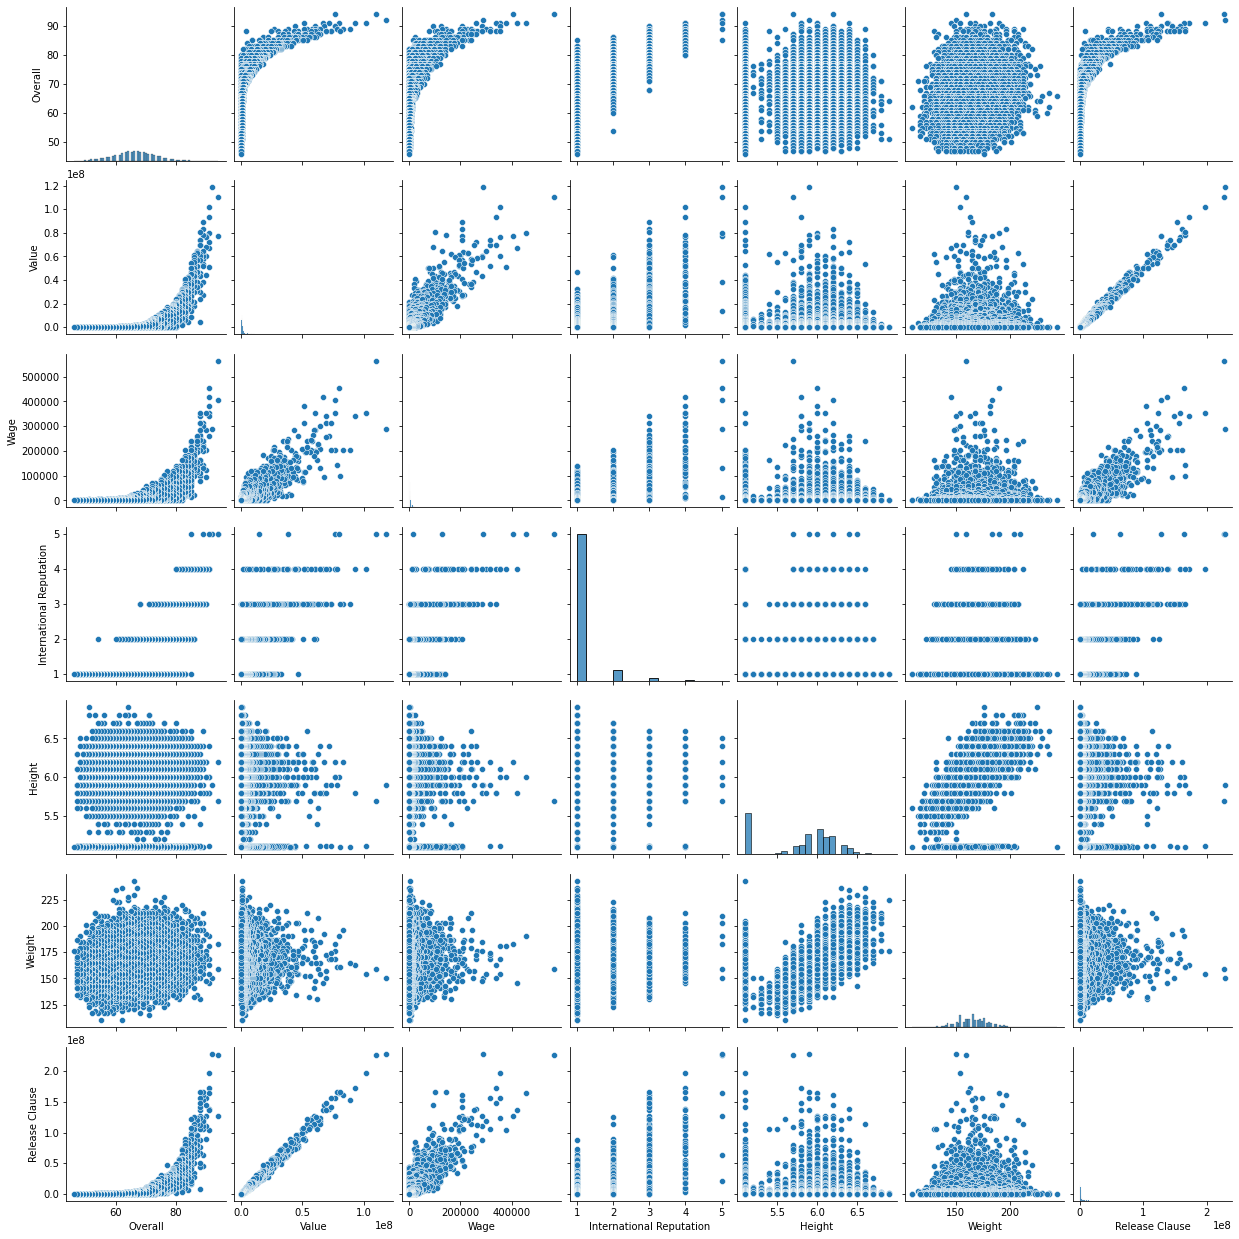

In [46]:
#Visualizing the correlation / relationship between multiple features using the pairplot
sns.pairplot(df_copy[["Overall", "Value", "Wage", "International Reputation", "Height", "Weight", "Release Clause"]])
plt.show()

In [47]:
#Correlation values between the numerical features
df_copy[["Overall", "Value", "Wage", "International Reputation", "Height", "Weight", "Release Clause"]].corr()

,Overall,Value,Wage,International Reputation,Height,Weight,Release Clause
Overall,1.000000,0.627085,0.571926,0.499491,0.040774,0.154634,0.616422
Value,0.627085,1.000000,0.858442,0.653176,0.013171,0.045943,0.994352
Wage,0.571926,0.858442,1.000000,0.668635,0.023286,0.064776,0.855922
International Reputation,0.499491,0.653176,0.668635,1.000000,0.028510,0.088340,0.641156
Height,0.040774,0.013171,0.023286,0.028510,1.000000,0.451535,0.013311
Weight,0.154634,0.045943,0.064776,0.088340,0.451535,1.000000,0.039847
Release Clause,0.616422,0.994352,0.855922,0.641156,0.013311,0.039847,1.000000


#### Inferences:

From the pairplot and the correlation table above:

a. Highly positively correlated features (0.8 to 1): Value and Wage; Value and Release Clause; Wage and Release Clause

b. Moderately positively correlated features (0.6 to 0.8): Value and Overall; Overall and Wage; Overall and Release Clause; Value and
International Rep

# 3. Table containing the top 20 players ranked by Overall score and whose contract expires in 2020

In [48]:
#Filtering the "Contract Value Until" feature with "1st Jan 2020" and sort the values based on "Overall Rating" feature
df_copy_rank = df_copy[df_copy["Contract Valid Until"]=="2020-01-01"].sort_values(by="Overall",ascending=False).sort_index()

#Applying the "first" ranking method to rank the observations in the descending order (i.e., 1, 2, 3, ....., n)
df_copy_rank["Players Ranking"] = df_copy_rank["Overall"].rank(method="first",ascending=False)

#Obtaining the top 20 overall ranked players and loading them into df_top_players dataframe
df_top_players = df_copy_rank[df_copy_rank["Players Ranking"]<=20]
df_top_players

,ID,Name,Age,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Players Ranking
3,193080,De Gea,27,91,93,Manchester United,72000000.0,260000.0,Right,4.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,1.0
5,183277,E. Hazard,27,91,91,Chelsea,93000000.0,340000.0,Right,4.0,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2.0
6,177003,L. Modrić,32,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,3.0
8,155862,Sergio Ramos,32,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,4.0
13,168542,David Silva,32,90,90,Manchester City,60000000.0,285000.0,Left,4.0,...,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0,5.0
21,179813,E. Cavani,31,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,4.0,...,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0,6.0
24,138956,G. Chiellini,33,89,89,Juventus,27000000.0,215000.0,Left,4.0,...,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0,7.0
31,190460,C. Eriksen,26,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,...,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0,8.0
39,164240,Thiago Silva,33,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,4.0,...,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0,9.0
46,193041,K. Navas,31,87,87,Real Madrid,30500000.0,195000.0,Right,3.0,...,28.0,14.0,14.0,90.0,81.0,75.0,82.0,90.0,62500000.0,10.0


# a) The average wage for this set of players 

In [49]:
print("The average wage of the top 20 players whose contract expires in 2020 is",df_top_players["Wage"].mean())

The average wage of the top 20 players whose contract expires in 2020 is 205150.0


# b) The average age

In [50]:
print('The median age of the top 20 players whose contract expires in 2020 is',df_top_players["Age"].median())

The median age of the top 20 players whose contract expires in 2020 is 31.0


# c) Correlation between the Overall rating and Value for these players

In [51]:
print("The correlation between the Overall rating and the Value of the top 20 players whose contract expires in 2020 is",
      round(df_top_players["Overall"].corr(df_top_players["Value"]),4))

The correlation between the Overall rating and the Value of the top 20 players whose contract expires in 2020 is 0.6668


#### Inferences:

a. The average wage of the top 20 players whose contract expires in 2020 is calculated using mean method, as it is a numerical feature and result is 205150.0.

b. Though age feature returns a numerical output, we cannot perform mathematical operations on the same, as it may not always yield a meaningful result. Hence, considering it as categorical data and using median to compute the average age of the top 20 players whose contract expires in 2020 which gives the result as 31.0.

c. The correlation between the two features 'Overall' and 'Value' are determined by corr() method and the correlation value is 0.6668. The correlation between these 2 features are moderately positive correlated.

# 4. Categorical features to numerical features with suitable encoding techniques

In [52]:
#The columns that are in Object type which need to convert to numerical
df_copy.select_dtypes(include = object)

,Name,Club,Preferred Foot,Work Rate,Body Type,Position
0,L. Messi,FC Barcelona,Left,Medium/ Medium,Messi,RF
1,Cristiano Ronaldo,Juventus,Right,High/ Low,C. Ronaldo,ST
2,Neymar Jr,Paris Saint-Germain,Right,High/ Medium,Neymar,LW
3,De Gea,Manchester United,Right,Medium/ Medium,Lean,GK
4,K. De Bruyne,Manchester City,Right,High/ High,Normal,RCM
...,...,...,...,...,...,...
18202,J. Lundstram,Crewe Alexandra,Right,Medium/ Medium,Lean,CM
18203,N. Christoffersson,Trelleborgs FF,Right,Medium/ Medium,Normal,ST
18204,B. Worman,Cambridge United,Right,Medium/ Medium,Normal,ST
18205,D. Walker-Rice,Tranmere Rovers,Right,Medium/ Medium,Lean,RW


In [53]:
#List of columns in Object type
df_copy.select_dtypes(include = object).columns

Index(['Name', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position'], dtype='object')

#### Inferences:
The 'Name', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type' and 'Position' are the features that need to be converted from categorical to numerical

In [54]:
#Treating with null values before applying the encoding

#Checking the null values for categorical feature
df_copy.select_dtypes(include = object).isnull().sum()

Name                0
Club              241
Preferred Foot     48
Work Rate          48
Body Type          48
Position           60
dtype: int64

In [55]:
#Applying mode imputation for the categorical feature
df_copy["Position"] = df_copy["Position"].fillna(df_copy["Position"].mode)
df_copy["Body Type"] = df_copy["Body Type"].fillna(df_copy["Body Type"].mode)
df_copy["Work Rate"] = df_copy["Work Rate"].fillna(df_copy["Work Rate"].mode)
df_copy["Preferred Foot"] = df_copy['Preferred Foot'].fillna(df_copy["Preferred Foot"].mode)

In [56]:
#Applying Encoding technique: Converting the above categorical feature to numerical feature

#N-1 encoding for the feature 'Preferred Foot'

# Using get_dummies() method and passing drop_first parameter
df_encoded = pd.get_dummies(df_copy, columns=["Preferred Foot"], drop_first = True)
df_encoded.head(5)

,ID,Name,Age,Overall,Potential,Club,Value,Wage,International Reputation,Weak Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Preferred Foot_Left,Preferred Foot_Right
0,158023,L. Messi,31,94,94,FC Barcelona,110500000.0,565000.0,5.0,4.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,1,0
1,20801,Cristiano Ronaldo,33,94,94,Juventus,77000000.0,405000.0,5.0,4.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,0,1
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,118500000.0,290000.0,5.0,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,0,1
3,193080,De Gea,27,91,93,Manchester United,72000000.0,260000.0,4.0,3.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,0,1
4,192985,K. De Bruyne,27,91,92,Manchester City,102000000.0,355000.0,4.0,5.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,0,1


#### Inferences:

The categorical Feature 'Preferred Foot' has the two values Left or Right. N-1 encoding is used here to convert categorical to numerical feature. The 'drop_first = True' and 'Preferred Foot' is passed to the function get_dummies().

As the result, the encoded numerical column "PreferredFoot_Right" is created which has the values of 0 and 1 (where, 0 = Left; 1 = Right). The existing column "Preferred Foot" will be dropped off from the dataframe. 

In [82]:
#Frequency encoding for 'Work Rate'

#Finding the frequencies of the catgories and dividing with the total count and storing the
encoding = df_copy['Work Rate'].value_counts()/len(df_copy)
encoding.head(8)

Medium/ Medium    0.538804
High/ Medium      0.174274
Medium/ High      0.092821
High/ High        0.055748
Medium/ Low       0.046685
High/ Low         0.038392
Low/ Medium       0.024661
Low/ High         0.024112
Name: Work Rate, dtype: float64

In [83]:
#map function is used to map the encoding key with 'Work Rate' column values.
df_encoded['Encoded_Work Rate'] = df_copy['Work Rate'].map(round(encoding,2))

#Display the top 5 values
df_encoded.head(5)

,ID,Name,Age,Overall,Potential,Club,Value,Wage,International Reputation,Weak Foot,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Preferred Foot_Left,Preferred Foot_Right,Encoded_Club,Encoded_Work Rate
0,158023,L. Messi,31,94,94,FC Barcelona,110500000.0,565000.0,5.0,4.0,...,6.0,11.0,15.0,14.0,8.0,226500000.0,1,0,53458384.15,0.54
1,20801,Cristiano Ronaldo,33,94,94,Juventus,77000000.0,405000.0,5.0,4.0,...,7.0,11.0,15.0,14.0,11.0,127100000.0,0,1,46084040.81,0.04
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,118500000.0,290000.0,5.0,5.0,...,9.0,9.0,15.0,15.0,11.0,228100000.0,0,1,39382292.29,0.17
3,193080,De Gea,27,91,93,Manchester United,72000000.0,260000.0,4.0,3.0,...,90.0,85.0,87.0,88.0,94.0,138600000.0,0,1,33737795.91,0.54
4,192985,K. De Bruyne,27,91,92,Manchester City,102000000.0,355000.0,4.0,5.0,...,15.0,13.0,5.0,10.0,13.0,196400000.0,0,1,44632119.44,0.06


#### Inferences:

The frequency encoding is applied to the categorical features(Work Rate) as it holds the different frequencies for each categories.

The encoded value is calculated by determining the frequency of each categories and dividing with the total number of observations.

The calculated value is then used to map the encoded key with 'Work Rate' column values and the new encoded numerical columns 'Encoded_Work Rate' is created.

In [63]:
#Target encoding for 'Club'

#Applying with smoothing factor and reducing the noise
smoothing_factor = 1.0
prior = df_encoded['Release Clause'].mean()

#the groupby the 'Club' and applying the aggregate function to 'Release Clause'
sts = df_encoded['Release Clause'].groupby(df_encoded['Club']).agg(['count','mean'])
weight = sts['count']/(smoothing_factor + sts['count'])

#Calculating the encoded value
smoothing = weight*sts['mean'] + (1-weight) * prior

#Mapping the encoded value with the Club feature value
df_encoded['Encoded_Club'] = df_encoded["Club"].map(round(smoothing,2))

#Displaying the top 5 values
df_encoded.head(5)

,ID,Name,Age,Overall,Potential,Club,Value,Wage,International Reputation,Weak Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Preferred Foot_Left,Preferred Foot_Right,Encoded_Club
0,158023,L. Messi,31,94,94,FC Barcelona,110500000.0,565000.0,5.0,4.0,...,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,1,0,53458384.15
1,20801,Cristiano Ronaldo,33,94,94,Juventus,77000000.0,405000.0,5.0,4.0,...,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,0,1,46084040.81
2,190871,Neymar Jr,26,92,93,Paris Saint-Germain,118500000.0,290000.0,5.0,5.0,...,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,0,1,39382292.29
3,193080,De Gea,27,91,93,Manchester United,72000000.0,260000.0,4.0,3.0,...,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,0,1,33737795.91
4,192985,K. De Bruyne,27,91,92,Manchester City,102000000.0,355000.0,4.0,5.0,...,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,0,1,44632119.44


#### Inferences: 

The target encoding is applied to Catgorical Feature('Club'). Considering the smoothing factor, the encoded value is calculated by the formuale e = w * mc + (1-w) mt, where, w = n/n+m , mc = in-category mean , mt = overall mean.

The calculated value is then used to map the encoded key with 'Club' column values and the new encoded numerical columns 'Encoded_Club' is created.

In [64]:
#Removing the categorical variable after the encoding

# Using the drop function to drop the columns
df_encoded.select_dtypes(include= object).columns
df_numerical = df_encoded.drop(columns=['Name', 'Club', 'Work Rate', 'Work Rate','Body Type','Position'])

In [66]:
# After dropping the categorical variable
print("The number of categorical features present after encoding is",df_numerical.select_dtypes(include = object))
print("The dimensions after droping the categorical columns",df_numerical.shape)

The number of categorical features present after encoding is Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[18207 rows x 0 columns]
The dimensions after droping the categorical columns (18207, 51)


#### Inferences:

As all the Catgorical variables are converted to numerical variables, the existing Catgorical variables is removed from the dataframe. 

# 5. Table containing the top 5 players by Overall rating for each unique position

In [67]:
#Extract the top 5 rows for each position
df_position = df_copy.groupby('Position')['Overall','Name','Position','Wage'].head(5)

#Removing null values from df_position
df_position.dropna(axis=0 , inplace= True)

#Sorting and displaying the df_position based on Position and Overall and storing in the d
dfPosition_updated = df_position.sort_values(by=['Position','Overall'], ascending=[True,False])

#Displaying the results
print(dfPosition_updated)

       Overall               Name  \
5018        70          R. Raldes   
6736        68            J. Arce   
7922        67       L. Gutiérrez   
9905        66          R. Vargas   
10628       65        D. Bejarano   
...        ...                ...   
1           94  Cristiano Ronaldo   
10          90     R. Lewandowski   
16          89            H. Kane   
23          89          S. Agüero   
36          88            G. Bale   

                                                Position      Wage  
5018   <bound method Series.mode of 0         RF\n1  ...       0.0  
6736   <bound method Series.mode of 0         RF\n1  ...       0.0  
7922   <bound method Series.mode of 0         RF\n1  ...       0.0  
9905   <bound method Series.mode of 0         RF\n1  ...       0.0  
10628  <bound method Series.mode of 0         RF\n1  ...       0.0  
...                                                  ...       ...  
1                                                     ST  405000.0  
10 

In [68]:
#Displaying the unique Position
print(dfPosition_updated.Position.unique())

[<bound method Series.mode of 0         RF
 1         ST
 2         LW
 3         GK
 4        RCM
         ...
 18202     CM
 18203     ST
 18204     ST
 18205     RW
 18206     CM
 Name: Position, Length: 18207, dtype: object> 'CAM' 'CB' 'CDM' 'CF' 'CM'
 'GK' 'LAM' 'LB' 'LCB' 'LCM' 'LDM' 'LF' 'LM' 'LS' 'LW' 'LWB' 'RAM' 'RB'
 'RCB' 'RCM' 'RDM' 'RF' 'RM' 'RS' 'RW' 'RWB' 'ST']


In [69]:
#Generate tables containing the top 5 players by Overall rating for each unique position
i = 0
j = 5
for k in range(0,27):
    globals()["var"+str(k)] = pd.DataFrame(dfPosition_updated[i:j])
    i = i+5;j = j+5

#Displaying the first Dataframe which contains top 5 for the Position 'CAM'
print("The first Dataframe which contains top 5 for the Position 'CAM'")
print(var0)
print("The datatype of var0 is" , type(var0))
print("\n")

#Displaying the last Dataframe which contains top 5 for the Position 'ST'
print("The last Dataframe which contains top 5 for the Position 'ST'")
print(var26)
print(type(var26))
print("The datatype of var26 is", type(var26))

The first Dataframe which contains top 5 for the Position 'CAM'
       Overall          Name  \
5018        70     R. Raldes   
6736        68       J. Arce   
7922        67  L. Gutiérrez   
9905        66     R. Vargas   
10628       65   D. Bejarano   

                                                Position  Wage  
5018   <bound method Series.mode of 0         RF\n1  ...   0.0  
6736   <bound method Series.mode of 0         RF\n1  ...   0.0  
7922   <bound method Series.mode of 0         RF\n1  ...   0.0  
9905   <bound method Series.mode of 0         RF\n1  ...   0.0  
10628  <bound method Series.mode of 0         RF\n1  ...   0.0  
The datatype of var0 is <class 'pandas.core.frame.DataFrame'>


The last Dataframe which contains top 5 for the Position 'ST'
     Overall          Name Position     Wage
450       80     M. Ginter      RWB  28000.0
465       80  P. Kadeřábek      RWB  39000.0
517       80    S. Coleman      RWB  97000.0
652       79  D. Caligiuri      RWB  33000.0
76

#### Inferences:

The tables are created for each position (Since there are 27 positions, 27 tables are created). Each table has Overall, Name, Position and Wage feature.

# a) List of players appearing in more than one Table

In [72]:
# Comparing each Dataframe to check if there is any common name

#Importing reduce library from functools module
from functools import reduce


#Comparing the dataframe
result = list(reduce(set.intersection, 
           map(set, [var0.Name, var1.Name, var2.Name,var3.Name,var4.Name,var5.Name,var6.Name,var7.Name,var8.Name,var9.Name,var10.Name,
             var11.Name,var12.Name,var13.Name,var14.Name,var15.Name,var16.Name,var17.Name,var18.Name,var19.Name,var20.Name,                                  
             var21.Name,var22.Name,var23.Name,var24.Name,var25.Name,var26.Name ])))

#Displaying the results
result

[]

#### Inferences:

Here, the reduce function is used with intersection which checks if there is any common Name in the dataframe's.

The above result returns an empty array which indicates there are no players appearing in more than one table 

In [70]:
#Cross verifying using the values in single dataframe - df_position
#Using value counts to find the frequency
df_position.Name.value_counts()

L. Messi         1
N. Keïta         1
K. Walker        1
I. Gündoğan      1
José Callejón    1
                ..
K. Koulibaly     1
S. Umtiti        1
Thiago Silva     1
G. Higuaín       1
D. Bejarano      1
Name: Name, Length: 140, dtype: int64

#### Inferences:

By applying the value_counts() method on 'Name' feature, we could see the value as 1 and hence there are no players appearing more than once.

# b) The average wage one can expect to pay for the top 5 in every position

In [84]:
# Average wage calculated from the value in single dataframe - df_position
df_position.groupby('Position')['Wage'].mean()

Position
<bound method Series.mode of 0         RF\n1         ST\n2         LW\n3         GK\n4        RCM\n        ... \n18202     CM\n18203     ST\n18204     ST\n18205     RW\n18206     CM\nName: Position, Length: 18207, dtype: object>         0.0
CAM                                                                                                                                                                                                                                     174000.0
CB                                                                                                                                                                                                                                      139600.0
CDM                                                                                                                                                                                                                                     217000.0
CF                         

#### Inferences:

The average wage for the top 5 in every position is calculated by grouping 'Position' and applying mean function 'Wage' feature